# Convolutional Neural Networks (Application)

###### Building and training a ConvNet  for a classification problem:


### The Data

The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion). Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). 


#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


#### Load Data

In [2]:
# Importing
train_set = pd.read_csv("sign_mnist_train.csv")
test_set= pd.read_csv("sign_mnist_test.csv")

# Shuffling
train_set.sample(frac=1)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
6232,21,150,153,155,157,160,161,162,163,162,...,93,70,192,225,219,220,219,219,220,216
8671,17,157,159,159,158,158,159,159,159,159,...,146,159,121,117,148,159,176,168,158,160
3432,15,97,96,98,101,102,103,114,127,140,...,139,141,127,186,220,201,189,181,152,123
4336,8,141,146,147,149,152,155,157,157,158,...,192,192,192,192,193,193,192,192,192,192
11234,20,132,138,142,144,147,149,152,156,158,...,210,208,207,206,206,205,204,202,201,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12007,18,213,213,213,213,213,213,212,210,210,...,250,252,251,249,246,245,246,243,240,238
2663,4,160,163,168,173,177,181,184,186,189,...,115,97,93,87,77,63,95,99,64,55
23064,0,197,198,200,203,204,206,207,209,212,...,75,54,169,255,244,248,248,249,248,247
4142,1,150,153,154,157,159,161,163,164,165,...,96,137,202,194,195,195,193,190,189,187


In [3]:
train_set.shape

(27455, 785)

In [4]:
train_set.label

0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64

In [5]:
# Setting x and y
x= train_set.drop(labels="label", axis=1)
y= train_set["label"].values
# define x_train y_train, x_test y_test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
# Normalization
# Normalize data in the range of zero to one
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_test = pd.DataFrame(scaler.transform(x_test))

# Reshaping
#28*28=784
x_train = x_train.values.reshape(-1, 28, 28, 1)
x_test = x_test.values.reshape(-1, 28, 28, 1)
x_train

array([[[[0.45098039],
         [0.4745098 ],
         [0.49803922],
         ...,
         [0.56470588],
         [0.55686275],
         [0.55294118]],

        [[0.45098039],
         [0.4745098 ],
         [0.50196078],
         ...,
         [0.56862745],
         [0.56470588],
         [0.56078431]],

        [[0.45882353],
         [0.48627451],
         [0.50980392],
         ...,
         [0.57254902],
         [0.56862745],
         [0.56862745]],

        ...,

        [[0.34117647],
         [0.3372549 ],
         [0.32941176],
         ...,
         [0.69803922],
         [0.60784314],
         [0.53333333]],

        [[0.34117647],
         [0.34509804],
         [0.34117647],
         ...,
         [0.67843137],
         [0.64313725],
         [0.53333333]],

        [[0.34117647],
         [0.34117647],
         [0.34117647],
         ...,
         [0.5372549 ],
         [0.63921569],
         [0.64313725]]],


       [[[0.62352941],
         [0.62352941],
         [0.62

y = 5


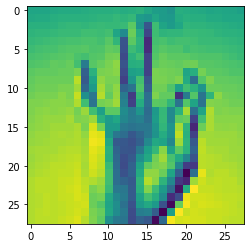

In [8]:
# Example of a picture
index = 7
plt.imshow(x_train[index])
print ("y = " + str((y_train[ index])))

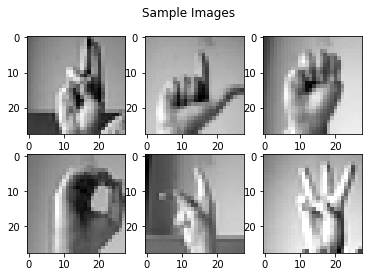

In [9]:
f, axes = plt.subplots(2,3)
f.suptitle('Sample Images')
img = 0
for i in range(2):
    for j in range(3):
        axes[i,j].imshow(x_train[img].reshape(28, 28), cmap="gray")
        img += 1

Text(0.5, 1.0, 'Frequency of Each Letter')

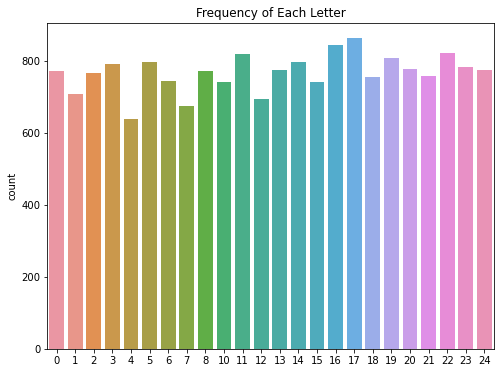

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(x=y_train)
plt.title("Frequency of Each Letter")

### Convolutional Neural Network (CNN) Model

In [11]:
model = Sequential()

# input layer
model.add(Conv2D(49, kernel_size=3, activation="relu",  input_shape = (28, 28, 1)))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
model.add(MaxPool2D(pool_size=4, strides=2))

model.add(Conv2D(98, kernel_size=4, activation="relu"))
model.add(MaxPool2D(pool_size=4, strides=1))

model.add(Conv2D(196, kernel_size=4, activation="relu"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(49,activation="relu"))
model.add(Dropout(0.25))

model.add(Dense(25,activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.build(input_shape= (28, 28, 1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 49)        490       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 49)        196       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 49)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 98)          76930     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 98)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 196)         307524    
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 196)         0

In [12]:
history = model.fit(x_train, y_train, batch_size=128, epochs=25, validation_data=(x_test, y_test), callbacks=[])

Epoch 1/25
144/144 [==============================] - 79s 552ms/step - loss: 2.1031 - accuracy: 0.3609 - val_loss: 0.4273 - val_accuracy: 0.8731
Epoch 2/25
144/144 [==============================] - 79s 550ms/step - loss: 0.3572 - accuracy: 0.8787 - val_loss: 0.0645 - val_accuracy: 0.9844
Epoch 3/25
144/144 [==============================] - 81s 564ms/step - loss: 0.1123 - accuracy: 0.9645 - val_loss: 0.0470 - val_accuracy: 0.9842
Epoch 4/25
144/144 [==============================] - 77s 534ms/step - loss: 0.0590 - accuracy: 0.9817 - val_loss: 0.0019 - val_accuracy: 0.9997
Epoch 5/25
144/144 [==============================] - 79s 548ms/step - loss: 0.0326 - accuracy: 0.9908 - val_loss: 0.0131 - val_accuracy: 0.9946
Epoch 6/25
144/144 [==============================] - 78s 541ms/step - loss: 0.0605 - accuracy: 0.9824 - val_loss: 0.3892 - val_accuracy: 0.9099
Epoch 7/25
144/144 [==============================] - 89s 621ms/step - loss: 0.0335 - accuracy: 0.9898 - val_loss: 0.0223 - val_ac

### Evaluate Model

In [18]:
predictions = model.predict_classes(x_test, batch_size=128)

print(classification_report(y_test, predictions, target_names = labels))

              precision    recall  f1-score   support

     Label 0       1.00      0.99      1.00       354
     Label 1       1.00      1.00      1.00       302
     Label 2       1.00      0.99      0.99       378
     Label 3       0.98      1.00      0.99       407
     Label 4       0.94      1.00      0.97       320
     Label 5       1.00      1.00      1.00       407
     Label 6       1.00      1.00      1.00       348
     Label 7       1.00      1.00      1.00       339
     Label 8       0.98      0.99      0.99       392
    Label 10       0.98      1.00      0.99       373
    Label 11       1.00      1.00      1.00       424
    Label 12       1.00      0.96      0.98       362
    Label 13       0.97      1.00      0.98       377
    Label 14       0.99      1.00      0.99       400
    Label 15       1.00      0.99      1.00       349
    Label 16       1.00      1.00      1.00       436
    Label 17       1.00      0.98      0.99       432
    Label 18       1.00    

### Plot

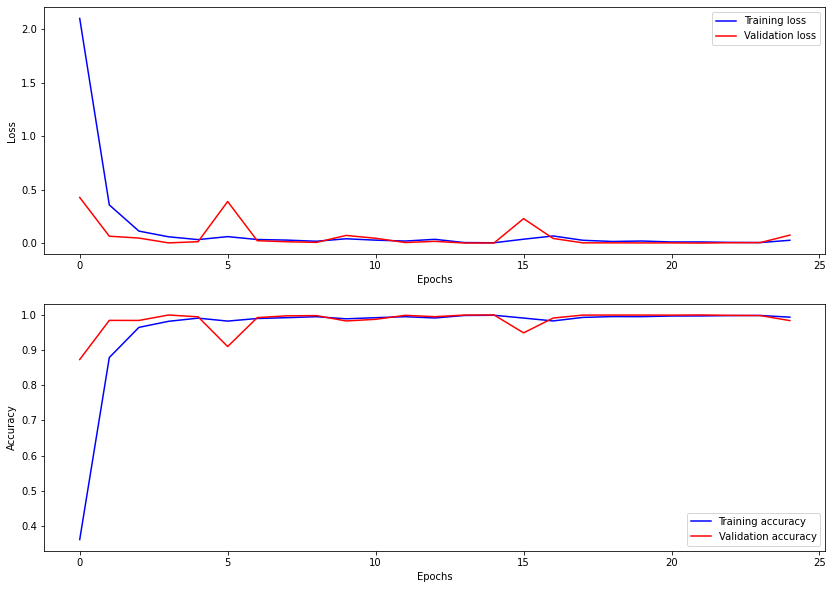

In [17]:
fig, axes = plt.subplots(2,1)
fig.set_size_inches(14,10)
axes[0].plot(history.history['loss'], color='b', label="Training loss")
axes[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =axes[0])
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
legend = axes[0].legend()

axes[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
axes[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
legend = axes[1].legend()